In [15]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scipy
# import mpmath

In [2]:
# define the parametrs used

A1 = 60
A2 = 4
A3 = 64
reduced_mass = A1*A2/(A1+A2)

Z1 = 28
Z2 = 2
Z3 = 30

pi = np.pi
e = np.sqrt(1.44) # sqrt(MeV-fm)
b_surf = 17 # MeV
h = 197.32 # Mev-fm
hcut = 1 # h/(2*pi)

In [3]:
# Defining function to solve with the Newton raphson method

# source for this code : 
# https://stackoverflow.com/questions/42449242/newton-raphsons-method-user-input-and-numerical-output-problems

def f(symx):
    tmp = sp.sympify(symx)
    return tmp

def fprime(symx):
    tmp = sp.diff(f(symx), r)
    return tmp;

def newtons_method(symx):   
    guess = sp.sympify(0.5) # Convert to an int immediately.
    div = f(symx)/fprime(symx)

    for i in range(1, 100):
        nextGuess = guess - div.subs(r, guess)
        guess = nextGuess
    return guess.evalf()

In [4]:
r = sp.Symbol('r')

V_coulomb = Z1*Z2*(e**2)/r   # MeV

R1 = (1.128)*(A1**(1/3))*(1 - 0.786*(A1**(-2/3))) # fm
R2 = (1.128)*(A2**(1/3))*(1 - 0.786*(A2**(-2/3))) # fm
V_0 = b_surf*(A1**(2/3) + A2**(2/3) - (A1+A2)**(2/3))
a = (0.356)*((R1+R2)*(A1**(2/3) + A2**(2/3) - (A1+A2)**(2/3)))/(R1*R2)

V_nuclear = -V_0/(1+sp.exp((r-R1-R2)/a))

V_net = V_coulomb + V_nuclear

dV_dr = sp.diff(V_net)

R_l = newtons_method(dV_dr)

In [6]:
d2V_dr2 = sp.diff(dV_dr)
omega = ((d2V_dr2.subs(r, R_l))/(reduced_mass))**(0.5)

In [8]:
r_B = 1.4
r_C = 1

R_B = r_B*((A1**(1/3)) + (A2**(1/3)))
R_C = r_C*((A1**(1/3)) + (A2**(1/3)))

V_B = V_net.subs(r, R_B)
V_C = V_net.subs(r, R_C)

In [9]:
E = sp.Symbol('E')

hcut_omega = hcut*omega

num = 1 + sp.exp(2*pi*(E-V_B)/hcut_omega)
den = 1 + sp.exp(2*pi*(E - V_B - ((R_C/R_B)**2)*(E - V_C))/hcut_omega)
sigma_fusion = (0.5)*(hcut_omega)*(R_B**2)*(1/E)*(sp.log(num/den))

sigma_fusion

42.6546545360949*log((1.730863381294e-18*exp(4.37041928831313*E) + 1)/(1.3269244904292e-18*exp(2.1406135289697*E) + 1))/E

In [10]:
E_values = np.linspace(10,38)
E_values

array([10.        , 10.57142857, 11.14285714, 11.71428571, 12.28571429,
       12.85714286, 13.42857143, 14.        , 14.57142857, 15.14285714,
       15.71428571, 16.28571429, 16.85714286, 17.42857143, 18.        ,
       18.57142857, 19.14285714, 19.71428571, 20.28571429, 20.85714286,
       21.42857143, 22.        , 22.57142857, 23.14285714, 23.71428571,
       24.28571429, 24.85714286, 25.42857143, 26.        , 26.57142857,
       27.14285714, 27.71428571, 28.28571429, 28.85714286, 29.42857143,
       30.        , 30.57142857, 31.14285714, 31.71428571, 32.28571429,
       32.85714286, 33.42857143, 34.        , 34.57142857, 35.14285714,
       35.71428571, 36.28571429, 36.85714286, 37.42857143, 38.        ])

In [11]:
sigma_fusion_values = np.zeros(50)

for i in range(50):
    sigma_fusion_values[i] = sigma_fusion.subs(E, E_values[i])
    
sigma_fusion_values

array([12.22036812, 21.41976975, 29.86383038, 37.49928681, 44.42566412,
       50.7364556 , 56.51015946, 61.81252028, 66.69894165, 71.21635393,
       75.40449856, 79.29635203, 82.91654586, 86.27401286, 89.33830858,
       91.98285828, 93.94216877, 95.03005002, 95.46173216, 95.59324483,
       95.62269174, 95.62170735, 95.61233306, 95.60098641, 95.58948608,
       95.57832556, 95.56762026, 95.55737943, 95.54758396, 95.53820841,
       95.52922723, 95.52061629, 95.51235324, 95.50441742, 95.49678979,
       95.48945273, 95.48238996, 95.47558637, 95.46902796, 95.4627017 ,
       95.45659548, 95.45069803, 95.44499881, 95.43948799, 95.43415638,
       95.42899539, 95.42399695, 95.4191535 , 95.41445794, 95.4099036 ])

<function matplotlib.pyplot.show(*args, **kw)>

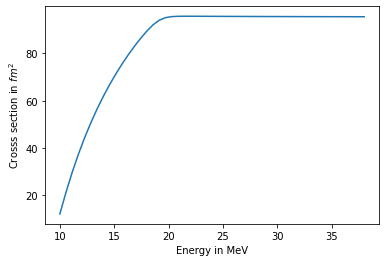

In [12]:
plt.plot(E_values, sigma_fusion_values)
plt.xlabel('Energy in MeV')
plt.ylabel('Crosss section in $fm^2$')
plt.show

Now, we calculate the cross section values for the residual reactions

The author of "An Experimental Verification of the Theory of Compound Nucleus*" has considered a total of three exit channels. 

In [13]:
reduced_masses = np.array([0.984375, 0.96875, 0.96875])

spin_multiplicity = np.array([2, 4, 4])

Q_values = np.array([-7.906, -17.022, -14.621])    # in MeV

Separation_energy = np.array([11.861, 20.978, 18.576])    # in MeV

T = 1.255 # MeV, nuclear temperature for the compound nucleus Zn-64

E_excitation = np.zeros([50,3]) # number of incident energy values vs no of exit channels

for i in range(50):
    for j in range(3):
        E_excitation[i][j] = Q_values[j] + (E_values[i])*(15/16)
        
a_values = (E_excitation+T)/(T**2)

threshold = np.array([0, 0, -9])  # 

R_values = E_excitation - Separation_energy - threshold

tau_values = np.zeros_like(E_excitation)

for i in range(tau_values.shape[0]):
    for j in range(tau_values.shape[1]):
        ax_Rx = (R_values[i][j])*(a_values[i][j])
        ax_Rx = np.abs(ax_Rx)
        tau_values[i][j] = (spin_multiplicity[j])*\
        (reduced_masses[j])*(ax_Rx)*(np.exp(2*((ax_Rx)**0.5)))
        
        
for i in range(tau_values.shape[0]):
    tau = tau_values[i][0]+tau_values[i][1]+tau_values[i][2]
    for j in range(tau_values.shape[1]):
        tau_values[i][j] = tau_values[i][j]/(tau)

residual_cross_sections = np.zeros_like(tau_values)

for i in range(residual_cross_sections.shape[0]):
    for j in range(residual_cross_sections.shape[1]):
        residual_cross_sections[i][j] = sigma_fusion_values[i]\
        *tau_values[i][j]

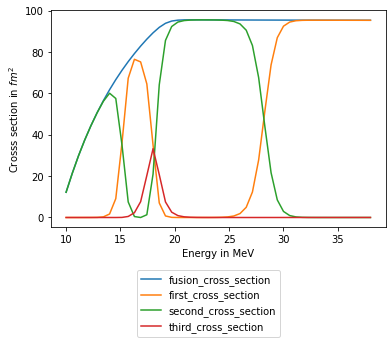

In [14]:
plt.plot(E_values, sigma_fusion_values, label='fusion_cross_section')
plt.plot(E_values, residual_cross_sections[:,0], label='first_cross_section')
plt.plot(E_values, residual_cross_sections[:,1], label='second_cross_section')
plt.plot(E_values, residual_cross_sections[:,2], label='third_cross_section')

plt.xlabel('Energy in MeV')
plt.ylabel('Crosss section in $fm^2$')

plt.legend(loc='center right', bbox_to_anchor=(0.70, -0.35))
plt.show()